In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# 1 - MNIST

In [3]:
## Usando um dataset já bem bonitinho
mnist = keras.datasets.mnist

In [4]:
(imagens_treino, treino_rotulos), (imagens_teste, teste_rotulos) = mnist.load_data() 

## Normalizando os dados
imagens_treino, imagens_teste = (imagens_treino / 255.0), (imagens_teste / 255.0)

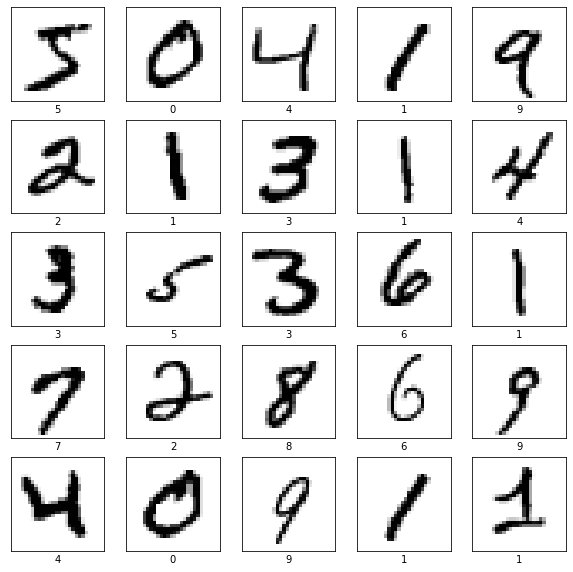

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagens_treino[i], cmap=plt.cm.binary)
    plt.xlabel(treino_rotulos[i])

Explorando a forma do nosso conjunto de dados podemos ver que temos que 60000 imagens de resolução 28x28 pixels.

### 1.3 - Criando um Modelo

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

W0810 11:21:15.813344 140433678969728 deprecation.py:506] From /nix/store/xhipk5xmzpq6c0109wmcxv823b0bgrx7-python3.7-tensorflow-1.14.0/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Treino

In [8]:
model.fit(imagens_treino, treino_rotulos, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3375 - acc: 0.9036
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1717 - acc: 0.9489
Epoch 3/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1323 - acc: 0.9611
Epoch 4/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1103 - acc: 0.9665
Epoch 5/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0971 - acc: 0.9704


In [9]:
test_loss, test_acc = model.evaluate(imagens_teste, teste_rotulos)

print(f"Precisão: {test_acc*100}%")

10000/10000 [==============================] - 0s 31us/sample - loss: 0.1055 - acc: 0.9680
Precisão: 96.79999947547913%


### 1.4 - Primeiras classifações

In [10]:
predictions = model.predict(imagens_teste)

predictions[0]

array([5.6411449e-07, 3.5929389e-07, 2.8865109e-04, 8.2070362e-03,
       3.3284170e-08, 2.8576444e-06, 1.8835545e-12, 9.9131328e-01,
       6.5822795e-05, 1.2132695e-04], dtype=float32)

In [12]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

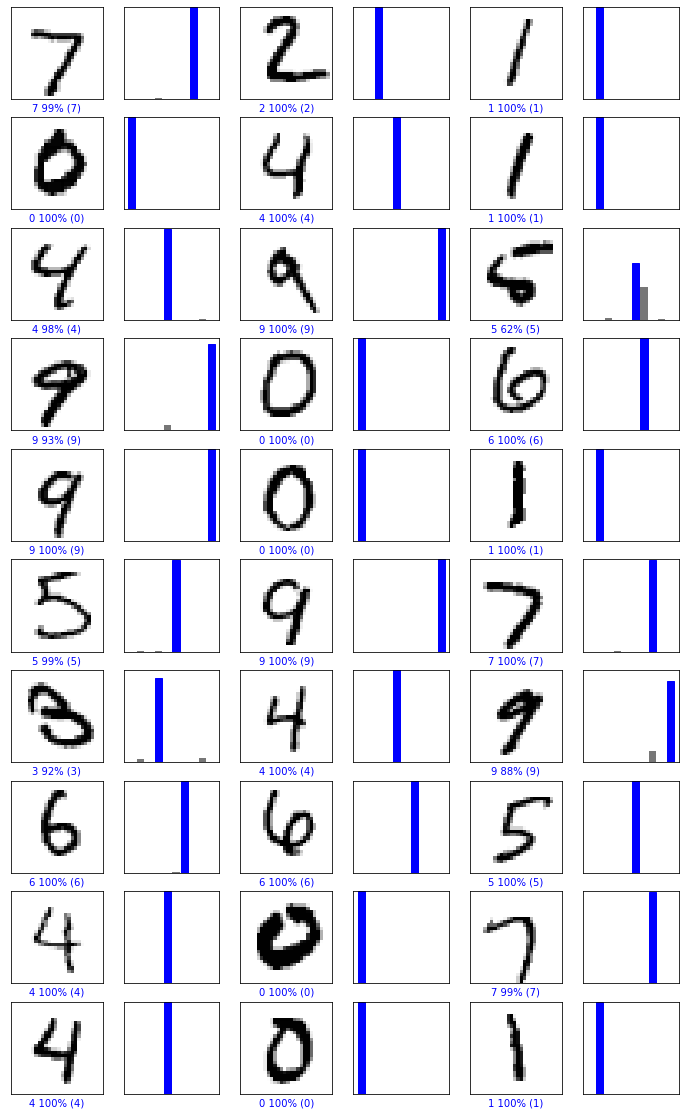

In [13]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, teste_rotulos, imagens_teste)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, teste_rotulos)

## O que será que essa rede aprendeu?

In [44]:
random_image = np.random.randint(0, 255, (1, 28, 28)) / 255.0

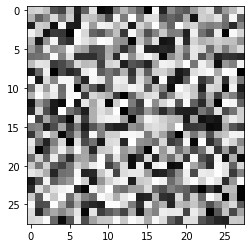

In [45]:
plt.imshow(random_image[0], cmap='Greys', interpolation='nearest')
plt.show()

In [46]:
result = model.predict(random_image)

for (i,j) in np.ndenumerate(result):
    print(f"{i[1]} - {j*100:.2f}%")

0 - 0.00%
1 - 0.00%
2 - 0.00%
3 - 1.96%
4 - 0.00%
5 - 83.42%
6 - 0.00%
7 - 14.62%
8 - 0.00%
9 - 0.00%
